# Deep Neural Network
Zehua Wang, biostat625 final project

## Imports

In [38]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# path
ROOT_DIR = os.path.abspath("../")

## Data Cleaning

In [3]:
# Date : year-month-day
# Rented Bike count - Count of bikes rented at each hour
# Hour - Hour of he day
# Temperature-Temperature in Celsius
# Humidity - %
# Windspeed - m/s
# Visibility - 10m
# Dew point temperature - Celsius
# Solar radiation - MJ/m2
# Rainfall - mm
# Snowfall - cm
# Seasons - Winter, Spring, Summer, Autumn
# Holiday - Holiday/No holiday
# Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [124]:
# load data
data_path = os.path.join(ROOT_DIR, 'data/SeoulBikeData.csv')
bike_data = pd.read_csv(data_path, encoding = 'unicode_escape')
# add year, month, day, and days of week
bike_data['Date'] = pd.to_datetime(bike_data['Date'])
bike_data['Year'] = pd.DatetimeIndex(bike_data['Date']).year
bike_data['Month'] = pd.DatetimeIndex(bike_data['Date']).month
bike_data['Day'] = pd.DatetimeIndex(bike_data['Date']).day
bike_data['DWeek'] = pd.DatetimeIndex(bike_data['Date']).weekday
bike_data.columns = (['Date','Rented_Bike_Count', 'Hour', 'Temperature',
                      'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temp',
                      'Solar_Rad', 'Rainfall', 'Snowfall', 'Seasons', 
                      'Holiday', 'Funct_Day','Year', 'Month', 'Day', 'DWeek'])
bike_data.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temp,Solar_Rad,Rainfall,Snowfall,Seasons,Holiday,Funct_Day,Year,Month,Day,DWeek
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,3
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,3
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,3
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,3
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,3


In [125]:
bike_data['Seasons'] = pd.factorize(bike_data['Seasons'])[0]
bike_data['Funct_Day'] = pd.factorize(bike_data['Funct_Day'])[0]
bike_data['Holiday'] = pd.factorize(bike_data['Holiday'])[0]
# bike_data['Rented_Bike_Count'] = bike_data['Rented_Bike_Count'].astype(float)

In [6]:
bike_data.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temp,Solar_Rad,Rainfall,Snowfall,Seasons,Holiday,Funct_Day,Year,Month,Day,DWeek
0,2017-01-12,254.0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,2017,1,12,3
1,2017-01-12,204.0,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,2017,1,12,3
2,2017-01-12,173.0,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,2017,1,12,3
3,2017-01-12,107.0,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,2017,1,12,3
4,2017-01-12,78.0,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,2017,1,12,3


In [7]:
## split data into a train and test set
bike_data = bike_data.sample(frac = 1, random_state = 625).\
                reset_index(drop = True)
data_size = bike_data.shape[0]
trainset = bike_data.iloc[:round(data_size*0.7), 1:].reset_index(drop = True)
valset = bike_data.iloc[round(data_size*0.7):round(data_size*0.8), 1:].reset_index(drop = True)
testset = bike_data.iloc[round(data_size*0.8):, 1:].reset_index(drop = True)

## Neural Network

In [68]:
CURRENT_DIR = os.path.join(ROOT_DIR, "NeuralNetwork")
WEIGHT_DIR = os.path.join(CURRENT_DIR, "weights")

In [122]:
# data prepare
X_train = trainset.iloc[:, 1:]
y_train = trainset.iloc[:, 0]
X_test = testset.iloc[:, 1:]
y_test = testset.iloc[:, 0]
X_val = valset.iloc[:, 1:]
y_val = valset.iloc[:, 0]
train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train = train.shuffle(len(X_train)).batch(4)
val = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val = train.shuffle(len(X_val)).batch(1)
test = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test = test.batch(1)

In [70]:
# model 1
def create_mod1():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1], )),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(1, activation='linear')
    ])
    model.compile(
        optimizer = 'adam',
        loss = 'mean_squared_error',
    )
    return model

In [72]:
mod1 = create_mod1()
mod1_path = "mod1/mod1cp.ckpt"
mod1_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(WEIGHT_DIR, mod1_path),
    save_weights_only = True,
    monitor = 'val_loss',
    mode = "min",
    verbose = 0,
    save_best_only = True
)
mod1_history = mod1.fit(train, 
                        epochs = 1000, 
                        validation_data = val, 
                        callbacks = [mod1_callback],
                        verbose = 2,
)
mod1_loss = mod1.evaluate(val)
print('Model 1 Loss {}'.format(mod1_loss))

Epoch 1/1000
1533/1533 - 13s - loss: 341268.0000 - val_loss: 306018.7188
Epoch 2/1000
1533/1533 - 12s - loss: 246240.1250 - val_loss: 212932.4688
Epoch 3/1000
1533/1533 - 13s - loss: 234598.6406 - val_loss: 206169.9844
Epoch 4/1000
1533/1533 - 12s - loss: 232534.5000 - val_loss: 210794.0781
Epoch 5/1000
1533/1533 - 13s - loss: 224663.8594 - val_loss: 211137.1406
Epoch 6/1000
1533/1533 - 13s - loss: 216495.6562 - val_loss: 197349.0156
Epoch 7/1000
1533/1533 - 13s - loss: 218359.1719 - val_loss: 219153.8281
Epoch 8/1000
1533/1533 - 13s - loss: 208606.5781 - val_loss: 192979.6875
Epoch 9/1000
1533/1533 - 13s - loss: 198708.7500 - val_loss: 188694.7812
Epoch 10/1000
1533/1533 - 13s - loss: 195743.7969 - val_loss: 175444.2344
Epoch 11/1000
1533/1533 - 13s - loss: 192398.0000 - val_loss: 174807.0469
Epoch 12/1000
1533/1533 - 13s - loss: 186581.5156 - val_loss: 218772.1094
Epoch 13/1000
1533/1533 - 13s - loss: 182029.9688 - val_loss: 166759.8438
Epoch 14/1000
1533/1533 - 13s - loss: 184708.59

Epoch 97/1000
1533/1533 - 13s - loss: 87551.9219 - val_loss: 74095.7422
Epoch 98/1000
1533/1533 - 13s - loss: 89024.5703 - val_loss: 68996.2500
Epoch 99/1000
1533/1533 - 13s - loss: 89190.0000 - val_loss: 86595.8672
Epoch 100/1000
1533/1533 - 13s - loss: 90739.1172 - val_loss: 67581.6016
Epoch 101/1000
1533/1533 - 13s - loss: 81977.0156 - val_loss: 97440.1172
Epoch 102/1000
1533/1533 - 13s - loss: 99952.9219 - val_loss: 95869.2031
Epoch 103/1000
1533/1533 - 13s - loss: 86214.6562 - val_loss: 77584.3047
Epoch 104/1000
1533/1533 - 13s - loss: 91786.4453 - val_loss: 100457.1406
Epoch 105/1000
1533/1533 - 13s - loss: 85403.3203 - val_loss: 67485.4141
Epoch 106/1000
1533/1533 - 13s - loss: 85698.4844 - val_loss: 89063.9922
Epoch 107/1000
1533/1533 - 13s - loss: 90650.1172 - val_loss: 102205.1328
Epoch 108/1000
1533/1533 - 13s - loss: 84572.5703 - val_loss: 70990.8281
Epoch 109/1000
1533/1533 - 13s - loss: 82133.2969 - val_loss: 80244.6641
Epoch 110/1000
1533/1533 - 13s - loss: 86418.2734 - 

Epoch 209/1000
1533/1533 - 13s - loss: 67211.1406 - val_loss: 62586.3789
Epoch 210/1000
1533/1533 - 13s - loss: 67845.2266 - val_loss: 60999.9062
Epoch 211/1000
1533/1533 - 13s - loss: 67260.2500 - val_loss: 59208.8867
Epoch 212/1000
1533/1533 - 13s - loss: 62729.7969 - val_loss: 49864.5430
Epoch 213/1000
1533/1533 - 13s - loss: 68055.5156 - val_loss: 74827.8047
Epoch 214/1000
1533/1533 - 13s - loss: 66078.7500 - val_loss: 53149.2500
Epoch 215/1000
1533/1533 - 13s - loss: 67149.6328 - val_loss: 71323.6172
Epoch 216/1000
1533/1533 - 13s - loss: 66105.9375 - val_loss: 105321.7500
Epoch 217/1000
1533/1533 - 13s - loss: 66853.9297 - val_loss: 56221.6211
Epoch 218/1000
1533/1533 - 13s - loss: 63041.1680 - val_loss: 56881.1445
Epoch 219/1000
1533/1533 - 13s - loss: 67224.7734 - val_loss: 54174.3555
Epoch 220/1000
1533/1533 - 13s - loss: 69488.7344 - val_loss: 61142.3672
Epoch 221/1000
1533/1533 - 13s - loss: 62847.7148 - val_loss: 53203.1250
Epoch 222/1000
1533/1533 - 13s - loss: 64488.7109 

1533/1533 - 13s - loss: 58129.5195 - val_loss: 55060.0820
Epoch 322/1000
1533/1533 - 13s - loss: 58066.6562 - val_loss: 61993.9258
Epoch 323/1000
1533/1533 - 13s - loss: 52487.0859 - val_loss: 47598.0859
Epoch 324/1000
1533/1533 - 13s - loss: 53948.0234 - val_loss: 48277.5781
Epoch 325/1000
1533/1533 - 13s - loss: 51809.0430 - val_loss: 49406.3047
Epoch 326/1000
1533/1533 - 13s - loss: 55981.1289 - val_loss: 49111.7070
Epoch 327/1000
1533/1533 - 13s - loss: 54115.1641 - val_loss: 52218.3398
Epoch 328/1000
1533/1533 - 13s - loss: 60052.1133 - val_loss: 74022.4453
Epoch 329/1000
1533/1533 - 13s - loss: 56923.8086 - val_loss: 46816.9688
Epoch 330/1000
1533/1533 - 13s - loss: 52808.9688 - val_loss: 44969.6055
Epoch 331/1000
1533/1533 - 13s - loss: 57803.0078 - val_loss: 79021.5547
Epoch 332/1000
1533/1533 - 13s - loss: 61035.8516 - val_loss: 56657.6016
Epoch 333/1000
1533/1533 - 13s - loss: 54265.8477 - val_loss: 57841.5586
Epoch 334/1000
1533/1533 - 13s - loss: 53822.8945 - val_loss: 4383

Epoch 434/1000
1533/1533 - 13s - loss: 46360.3008 - val_loss: 34491.0625
Epoch 435/1000
1533/1533 - 13s - loss: 46793.3711 - val_loss: 53471.2539
Epoch 436/1000
1533/1533 - 13s - loss: 46430.8516 - val_loss: 39426.2500
Epoch 437/1000
1533/1533 - 13s - loss: 46879.2578 - val_loss: 34120.3594
Epoch 438/1000
1533/1533 - 14s - loss: 50667.2305 - val_loss: 37080.4922
Epoch 439/1000
1533/1533 - 13s - loss: 48022.0586 - val_loss: 37578.2539
Epoch 440/1000
1533/1533 - 13s - loss: 50792.9766 - val_loss: 54511.3203
Epoch 441/1000
1533/1533 - 13s - loss: 45975.1758 - val_loss: 38410.5234
Epoch 442/1000
1533/1533 - 13s - loss: 46898.1719 - val_loss: 69239.8906
Epoch 443/1000
1533/1533 - 13s - loss: 46978.7227 - val_loss: 37552.5547
Epoch 444/1000
1533/1533 - 13s - loss: 52309.6211 - val_loss: 41230.9922
Epoch 445/1000
1533/1533 - 13s - loss: 51085.0820 - val_loss: 63023.1406
Epoch 446/1000
1533/1533 - 13s - loss: 46200.3398 - val_loss: 52041.9727
Epoch 447/1000
1533/1533 - 13s - loss: 44969.1133 -

Epoch 547/1000
1533/1533 - 13s - loss: 43738.4883 - val_loss: 38385.0195
Epoch 548/1000
1533/1533 - 13s - loss: 41377.9648 - val_loss: 55142.5977
Epoch 549/1000
1533/1533 - 13s - loss: 41755.0625 - val_loss: 41407.4922
Epoch 550/1000
1533/1533 - 14s - loss: 44141.1719 - val_loss: 46504.8594
Epoch 551/1000
1533/1533 - 13s - loss: 40699.4336 - val_loss: 42770.2461
Epoch 552/1000
1533/1533 - 13s - loss: 39583.8398 - val_loss: 35274.3008
Epoch 553/1000
1533/1533 - 13s - loss: 39175.5234 - val_loss: 33118.3320
Epoch 554/1000
1533/1533 - 13s - loss: 41487.3047 - val_loss: 37750.4766
Epoch 555/1000
1533/1533 - 13s - loss: 38549.5898 - val_loss: 53440.7656
Epoch 556/1000
1533/1533 - 13s - loss: 42457.5273 - val_loss: 43427.6484
Epoch 557/1000
1533/1533 - 13s - loss: 36593.3594 - val_loss: 26912.4980
Epoch 558/1000
1533/1533 - 13s - loss: 39382.9414 - val_loss: 32566.8906
Epoch 559/1000
1533/1533 - 13s - loss: 39611.7969 - val_loss: 62666.5312
Epoch 560/1000
1533/1533 - 13s - loss: 38199.5508 -

Epoch 660/1000
1533/1533 - 13s - loss: 30903.6641 - val_loss: 47804.7109
Epoch 661/1000
1533/1533 - 13s - loss: 44548.4688 - val_loss: 104492.6094
Epoch 662/1000
1533/1533 - 13s - loss: 33884.5625 - val_loss: 30404.0020
Epoch 663/1000
1533/1533 - 13s - loss: 34562.8438 - val_loss: 31874.6699
Epoch 664/1000
1533/1533 - 13s - loss: 34857.9531 - val_loss: 66956.1719
Epoch 665/1000
1533/1533 - 13s - loss: 33045.3711 - val_loss: 43340.1680
Epoch 666/1000
1533/1533 - 13s - loss: 33593.2188 - val_loss: 32089.9434
Epoch 667/1000
1533/1533 - 13s - loss: 34219.3555 - val_loss: 42511.7617
Epoch 668/1000
1533/1533 - 13s - loss: 32630.9375 - val_loss: 22835.3242
Epoch 669/1000
1533/1533 - 13s - loss: 31424.1719 - val_loss: 28790.9043
Epoch 670/1000
1533/1533 - 13s - loss: 42827.0586 - val_loss: 29933.8184
Epoch 671/1000
1533/1533 - 13s - loss: 33812.7656 - val_loss: 40304.0664
Epoch 672/1000
1533/1533 - 13s - loss: 34393.7578 - val_loss: 26631.8008
Epoch 673/1000
1533/1533 - 13s - loss: 31301.0645 

1533/1533 - 13s - loss: 29702.3867 - val_loss: 22852.2559
Epoch 773/1000
1533/1533 - 13s - loss: 29210.9258 - val_loss: 24351.9199
Epoch 774/1000
1533/1533 - 13s - loss: 30272.0781 - val_loss: 19501.5430
Epoch 775/1000
1533/1533 - 13s - loss: 28927.6270 - val_loss: 22330.2344
Epoch 776/1000
1533/1533 - 13s - loss: 30919.7676 - val_loss: 21380.2188
Epoch 777/1000
1533/1533 - 13s - loss: 30146.7344 - val_loss: 22711.0938
Epoch 778/1000
1533/1533 - 13s - loss: 27603.8086 - val_loss: 35295.8789
Epoch 779/1000
1533/1533 - 13s - loss: 29472.7695 - val_loss: 38968.4883
Epoch 780/1000
1533/1533 - 13s - loss: 31255.1680 - val_loss: 25023.1133
Epoch 781/1000
1533/1533 - 13s - loss: 30831.6328 - val_loss: 107125.1484
Epoch 782/1000
1533/1533 - 13s - loss: 29675.2070 - val_loss: 19988.4570
Epoch 783/1000
1533/1533 - 13s - loss: 30296.9258 - val_loss: 31372.8086
Epoch 784/1000
1533/1533 - 13s - loss: 28308.5664 - val_loss: 19872.8633
Epoch 785/1000
1533/1533 - 13s - loss: 31143.4629 - val_loss: 739

Epoch 885/1000
1533/1533 - 13s - loss: 27462.0137 - val_loss: 17915.7031
Epoch 886/1000
1533/1533 - 13s - loss: 26308.3730 - val_loss: 35062.7773
Epoch 887/1000
1533/1533 - 13s - loss: 24496.5742 - val_loss: 18758.5391
Epoch 888/1000
1533/1533 - 13s - loss: 24984.2344 - val_loss: 54890.1172
Epoch 889/1000
1533/1533 - 13s - loss: 25835.9297 - val_loss: 18346.8730
Epoch 890/1000
1533/1533 - 13s - loss: 25717.0957 - val_loss: 21930.1445
Epoch 891/1000
1533/1533 - 13s - loss: 31059.2012 - val_loss: 26911.0156
Epoch 892/1000
1533/1533 - 13s - loss: 23458.0977 - val_loss: 19335.1738
Epoch 893/1000
1533/1533 - 13s - loss: 26692.8438 - val_loss: 34658.9102
Epoch 894/1000
1533/1533 - 13s - loss: 26821.3652 - val_loss: 29790.3828
Epoch 895/1000
1533/1533 - 13s - loss: 24953.0391 - val_loss: 19846.3594
Epoch 896/1000
1533/1533 - 13s - loss: 26191.6875 - val_loss: 40444.8047
Epoch 897/1000
1533/1533 - 13s - loss: 27764.5566 - val_loss: 36604.2734
Epoch 898/1000
1533/1533 - 13s - loss: 27046.4297 -

Epoch 998/1000
1533/1533 - 13s - loss: 18837.5000 - val_loss: 30052.0469
Epoch 999/1000
1533/1533 - 13s - loss: 30271.1562 - val_loss: 22283.8301
Epoch 1000/1000
1533/1533 - 13s - loss: 23953.6309 - val_loss: 31019.6133
1533/1533 [==============================] - 8s 5ms/step - loss: 31019.6250
Model 1 Loss 31019.625


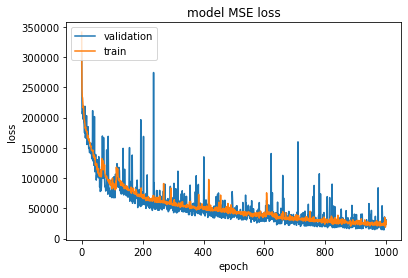

In [86]:
plt.plot(mod1_history.history['val_loss'])
plt.plot(mod1_history.history['loss'])
plt.title('model MSE loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['validation', 'train'], loc='upper left')
plt.show()

In [74]:
print(np.argmin(mod1_history.history['loss']),
      np.argmin(mod1_history.history['val_loss']))

997 992


In [75]:
print(min(mod1_history.history['loss']),
      min(mod1_history.history['val_loss']))

18837.5 14269.181640625


In [78]:
test_mod = create_mod1()
test_mod.load_weights(os.path.join(WEIGHT_DIR, "mod1/mod1cp.ckpt"))

In [97]:
test_mod.evaluate(val)

1533/1533 [==============================] - 8s 5ms/step - loss: 14269.1729


14269.1728515625

In [96]:
test_mod.evaluate(test)

1752/1752 [==============================] - 4s 2ms/step - loss: 50382.0586


50382.05859375

In [95]:
mod1.evaluate(test)

1752/1752 [==============================] - 4s 2ms/step - loss: 61758.7812


61758.78125

In [120]:
np.mean((mod1.predict(test).reshape((len(y_test),)) - y_test)**2)

61758.755065422716

In [ ]:
# model 2
def create_mod2():  
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1], )),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='linear')
    ])
    model.compile(
        optimizer = 'adam',
        loss = 'mean_squared_error',
    )
    return model

In [104]:
mod2 = create_mod2()
mod2_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(WEIGHT_DIR, "mod2cp.ckpt"),
    save_weights_only=True,
    verbose=2
)
mod2_history = mod2.fit(
    train, epochs = 500, 
    validation_data = val,
    callbacks = [mod2_callback],
    verbose = 2
)
mod2_loss = mod2.evaluate(val)
print('Model 2 Loss {}'.format(mod2_loss))

Epoch 1/500
1533/1533 [==============================] - 10s 6ms/step - loss: 351553.5938 - val_loss: 243979.3281
Epoch 2/500
1533/1533 [==============================] - 9s 6ms/step - loss: 253796.7812 - val_loss: 247437.9375
Epoch 3/500
1533/1533 [==============================] - 9s 6ms/step - loss: 236611.7500 - val_loss: 226750.0625
Epoch 4/500
1533/1533 [==============================] - 9s 6ms/step - loss: 238383.0469 - val_loss: 231681.6719
Epoch 5/500
1533/1533 [==============================] - 9s 6ms/step - loss: 227100.2031 - val_loss: 216156.8438
Epoch 6/500
1533/1533 [==============================] - 9s 6ms/step - loss: 226291.7188 - val_loss: 211123.8125
Epoch 7/500
1533/1533 [==============================] - 10s 6ms/step - loss: 219594.3906 - val_loss: 192596.5469
Epoch 8/500
1533/1533 [==============================] - 10s 6ms/step - loss: 218792.7500 - val_loss: 191198.5938
Epoch 9/500
1533/1533 [==============================] - 10s 6ms/step - loss: 208337.2188 - v

1533/1533 [==============================] - 10s 6ms/step - loss: 126213.9453 - val_loss: 153693.4688
Epoch 70/500
1533/1533 [==============================] - 9s 6ms/step - loss: 128133.9141 - val_loss: 111979.0703
Epoch 71/500
1533/1533 [==============================] - 10s 6ms/step - loss: 127220.5312 - val_loss: 135725.4219
Epoch 72/500
1533/1533 [==============================] - 10s 6ms/step - loss: 129540.0938 - val_loss: 108513.6875
Epoch 73/500
1533/1533 [==============================] - 10s 6ms/step - loss: 126675.5312 - val_loss: 105171.5469
Epoch 74/500
1533/1533 [==============================] - 10s 6ms/step - loss: 126322.9531 - val_loss: 129021.0859
Epoch 75/500
1533/1533 [==============================] - 10s 6ms/step - loss: 128411.7734 - val_loss: 157791.9531
Epoch 76/500
1533/1533 [==============================] - 10s 6ms/step - loss: 125568.9219 - val_loss: 117677.1016
Epoch 77/500
1533/1533 [==============================] - 9s 6ms/step - loss: 123234.1406 - va

Epoch 212/500
1533/1533 [==============================] - 10s 6ms/step - loss: 86107.0078 - val_loss: 137536.0781
Epoch 213/500
1533/1533 [==============================] - 10s 6ms/step - loss: 84103.7812 - val_loss: 100100.0703
Epoch 214/500
1533/1533 [==============================] - 10s 6ms/step - loss: 84683.8281 - val_loss: 63801.1992
Epoch 215/500
1533/1533 [==============================] - 9s 6ms/step - loss: 84727.1406 - val_loss: 65502.1797
Epoch 216/500
1533/1533 [==============================] - 9s 6ms/step - loss: 83671.7031 - val_loss: 108722.5156
Epoch 217/500
1533/1533 [==============================] - 9s 6ms/step - loss: 84618.7031 - val_loss: 66252.1875
Epoch 218/500
1533/1533 [==============================] - 10s 6ms/step - loss: 80651.6641 - val_loss: 68711.4141
Epoch 219/500
1533/1533 [==============================] - 10s 6ms/step - loss: 85316.5391 - val_loss: 61781.2148
Epoch 220/500
1533/1533 [==============================] - 10s 6ms/step - loss: 90092.82

Epoch 284/500
1533/1533 [==============================] - 10s 6ms/step - loss: 77113.2891 - val_loss: 61191.0664
Epoch 285/500
1533/1533 [==============================] - 10s 6ms/step - loss: 69972.1406 - val_loss: 56558.3242
Epoch 286/500
1533/1533 [==============================] - 10s 6ms/step - loss: 76243.2109 - val_loss: 91906.8359
Epoch 287/500
1533/1533 [==============================] - 10s 6ms/step - loss: 76935.9453 - val_loss: 53906.5312
Epoch 288/500
1533/1533 [==============================] - 10s 6ms/step - loss: 77838.4766 - val_loss: 56405.4883
Epoch 289/500
1533/1533 [==============================] - 10s 6ms/step - loss: 76710.9922 - val_loss: 60612.9844
Epoch 290/500
1533/1533 [==============================] - 10s 6ms/step - loss: 76164.1719 - val_loss: 67203.4062
Epoch 291/500
1533/1533 [==============================] - 10s 6ms/step - loss: 75852.9766 - val_loss: 57664.4453
Epoch 292/500
1533/1533 [==============================] - 10s 6ms/step - loss: 72876.88

Epoch 356/500
1533/1533 [==============================] - 9s 6ms/step - loss: 71410.9922 - val_loss: 54389.8867
Epoch 357/500
1533/1533 [==============================] - 10s 6ms/step - loss: 70249.9844 - val_loss: 52370.6875
Epoch 358/500
1533/1533 [==============================] - 10s 7ms/step - loss: 67809.2656 - val_loss: 56331.1211
Epoch 359/500
1533/1533 [==============================] - 10s 6ms/step - loss: 77376.2500 - val_loss: 59018.4062
Epoch 360/500
1533/1533 [==============================] - 10s 6ms/step - loss: 76280.0000 - val_loss: 68585.9766
Epoch 361/500
1533/1533 [==============================] - 10s 6ms/step - loss: 74245.8906 - val_loss: 48705.1680
Epoch 362/500
1533/1533 [==============================] - 10s 6ms/step - loss: 72568.8594 - val_loss: 62166.6172
Epoch 363/500
1533/1533 [==============================] - 10s 6ms/step - loss: 68511.2344 - val_loss: 80671.5234
Epoch 364/500
1533/1533 [==============================] - 10s 6ms/step - loss: 71955.570

1533/1533 [==============================] - 10s 6ms/step - loss: 64876.4375 - val_loss: 48300.9531
Epoch 500/500
1533/1533 [==============================] - 5s 3ms/step - loss: 55950.0430
Model 2 Loss 55950.04296875


In [105]:
print(mod2_history.history.keys())

dict_keys(['loss', 'val_loss'])


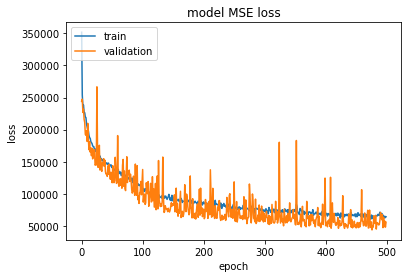

In [106]:
plt.plot(mod2_history.history['loss'])
plt.plot(mod2_history.history['val_loss'])
plt.title('model MSE loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()